In [73]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import sys
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

In [172]:
import skimage.data
import matplotlib.image as mpimg 
img=skimage.data.rocket()
img=mpimg.imread('data/cat.jpg')

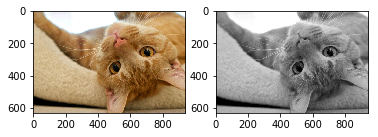

In [173]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(skimage.color.rgb2gray(img),cmap=plt.cm.gray)

In [174]:
igrey=skimage.color.rgb2gray(img)

In [175]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.21, 0.72, 0.07])

In [189]:
split=450
limg=img[:,:split,:]
rimg=img[:,split:,:]
lgrey=igrey[:,:split]
rgrey=igrey[:,split:]

In [190]:
grey3x3=[]
r3x3=[]
g3x3=[]
b3x3=[]
for row in range(limg.shape[0]-2):
    for col in range(limg.shape[1]-2):
        grey3x3.append(lgrey[row:row+3,col:col+3])
        r3x3.append(limg[row:row+3,col:col+3,0])
        g3x3.append(limg[row:row+3,col:col+3,1])
        b3x3.append(limg[row:row+3,col:col+3,2])

grey3x3=np.array(grey3x3)
r3x3=np.array(r3x3)
g3x3=np.array(g3x3)
b3x3=np.array(b3x3)


inputX=grey3x3.reshape((grey3x3.shape[0],9))

y_r=limg[:,:,0][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)
y_g=limg[:,:,1][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)
y_b=limg[:,:,2][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)

In [191]:
limg_edge=limg[1:limg.shape[0]-1,1:limg.shape[1]-1,:]
rimg_edge=rimg[1:rimg.shape[0]-1,1:rimg.shape[1]-1,:]

In [192]:
grey3x3=[]
r3x3=[]
g3x3=[]
b3x3=[]
for row in range(rimg.shape[0]-2):
    for col in range(rimg.shape[1]-2):
        grey3x3.append(rgrey[row:row+3,col:col+3])
        r3x3.append(rimg[row:row+3,col:col+3,0])
        g3x3.append(rimg[row:row+3,col:col+3,1])
        b3x3.append(rimg[row:row+3,col:col+3,2])

grey3x3=np.array(grey3x3)
r3x3=np.array(r3x3)
g3x3=np.array(g3x3)
b3x3=np.array(b3x3)


test_X=grey3x3.reshape((grey3x3.shape[0],9))

test_r=rimg[:,:,1][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)
test_g=rimg[:,:,2][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)
test_b=rimg[:,:,2][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)

In [193]:
lr_r=LinearRegression().fit(inputX,y_r)

print(lr_r.score(test_X,test_r))

pred_r=lr_r.predict(test_X)

pred_r=pred_r.astype('uint8')
pred_r=pred_r.reshape(rimg.shape[0]-2,rimg.shape[1]-2)

0.5607051319700433


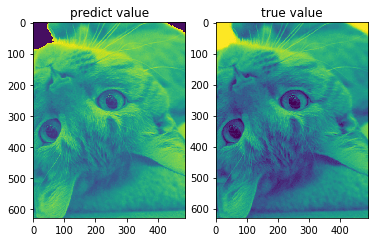

In [194]:
plt.subplot(121)
plt.imshow(pred_r)
plt.gca().set_title('predict value')
plt.subplot(122)
plt.imshow(rimg[:,:,1])
plt.gca().set_title('true value')

plt.show()

In [195]:
lr_g=LinearRegression().fit(inputX,y_g)

print(lr_g.score(test_X,test_g))

pred_g=lr_g.predict(test_X)

pred_g=pred_g.astype('uint8')
pred_g=pred_g.reshape(rimg.shape[0]-2,rimg.shape[1]-2)

0.043412130152640005


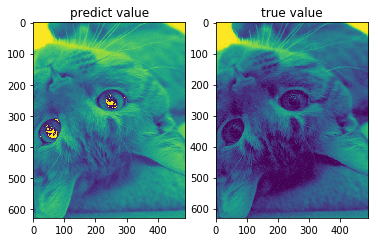

In [196]:
plt.subplot(121)
plt.imshow(pred_g)
plt.gca().set_title('predict value')
plt.subplot(122)
plt.imshow(rimg[:,:,2])
plt.gca().set_title('true value')

plt.show()

In [197]:
lr_b=LinearRegression().fit(inputX,y_b)

print(lr_b.score(test_X,test_b))

pred_b=lr_b.predict(test_X)

pred_b=pred_b.astype('uint8')
pred_b=pred_b.reshape(rimg.shape[0]-2,rimg.shape[1]-2)

0.8604678346874304


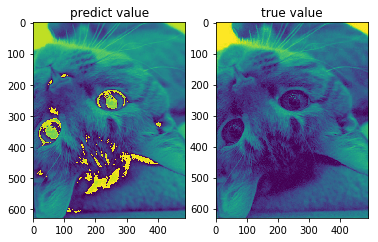

In [198]:
plt.subplot(121)
plt.imshow(pred_b)
plt.gca().set_title('predict value')
plt.subplot(122)
plt.imshow(rimg[:,:,2])
plt.gca().set_title('true value')

plt.show()

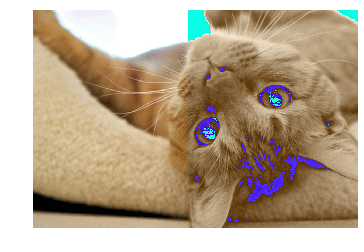

In [199]:
pred_rimg=np.array([pred_r,pred_g,pred_b])

pred_rimg=pred_rimg.transpose((1,2,0))

compare_img=np.append(limg_edge,pred_rimg,axis=1)
plt.axis('off')

plt.imshow(compare_img)


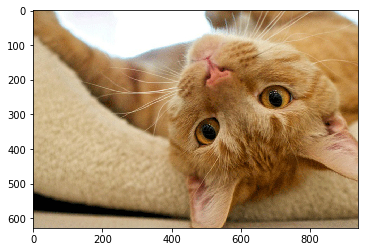

In [200]:
true_rimg=np.array([rimg_edge[:,:,0],rimg_edge[:,:,1],rimg_edge[:,:,2]])

true_rimg=true_rimg.transpose((1,2,0))

compare_img=np.append(limg_edge,true_rimg,axis=1)

plt.imshow(compare_img)

In [201]:
np.linalg.norm(true_rimg-pred_rimg)

172611.80282645795

In [47]:
lr_a=LinearRegression().fit(inputX,y_r)

print(lr_a.score(inputX,y_r))

pred_a=lr_a.predict(inputX)

pred_a=pred_a.astype('uint8')
pred_a=pred_a.reshape(limg.shape[0]-2,limg.shape[1]-2)

0.9970180135829646


In [52]:
lr_b=LinearRegression().fit(inputX,y_g)

print(lr_b.score(inputX,y_g))

pred_b=lr_b.predict(inputX)

pred_b=pred_b.astype('uint8')
pred_b=pred_b.reshape(limg.shape[0]-2,limg.shape[1]-2)

0.5203667566096457


In [53]:
lr_c=LinearRegression().fit(inputX,y_b)

print(lr_c.score(inputX,y_b))

pred_c=lr_c.predict(inputX)

pred_c=pred_c.astype('uint8')
pred_c=pred_c.reshape(limg.shape[0]-2,limg.shape[1]-2)

0.5203667566096457


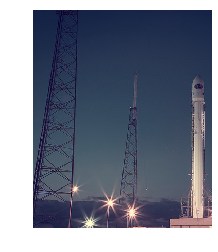

In [50]:
pred_rimg=np.array([limg[:,:,0][1:limg.shape[0]-1,1:limg.shape[1]-1],pred_a,pred_b])

pred_rimg=pred_rimg.transpose((1,2,0))

#compare_img=np.append(limg_edge,pred_rimg,axis=1)
plt.axis('off')

plt.imshow(pred_rimg)


array([ 17,  17,  17, ..., 243, 242, 245], dtype=uint8)